<a href="https://colab.research.google.com/github/SyedAnasAli3/Track/blob/master/Deep_Neural_netwrk_to_classify_MNIST_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test , y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


our training dataset has 60000 images, and our test dataset has 10000 images in the form of 28x28 pixel matrices. Its all put under two tuples() one of training and the other of test.

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels" 
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels" 
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


assert()-> function  takes in a single argument, which is usually just a condition that is either going to be true (code runs smoothly with no issues) or false (code will stop and display an error). We can choose to write a string after the function call to clarify the error that you want to see when that specific condition isn't met. This is very helpful in debugging.

plt.subplots()-> allows us to display multiple plots on the same figure. it also returns a tuple which contains two values an instance of our figure and axs.

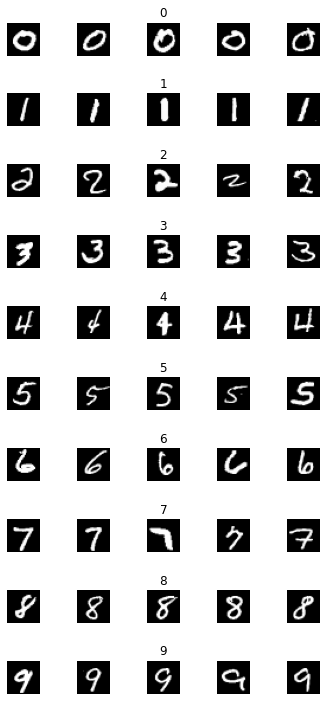

In [ ]:
no_of_samples = []

cols = 5
no_of_classes = 10

fig, axs = plt.subplots(nrows = no_of_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(no_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1) ), :, :],cmap= plt.get_cmap("gray")  ) 
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      no_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'NUMBER OF SAMPLE IMAGES')

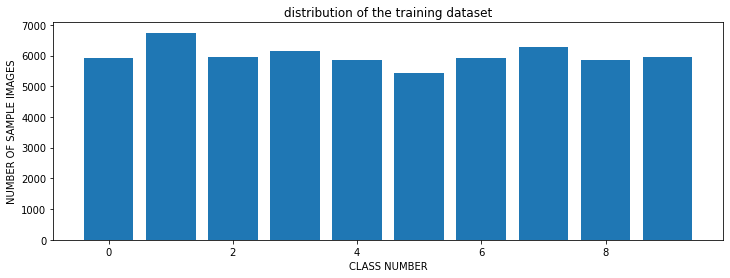

In [ ]:
print(no_of_samples)
plt.figure(figsize=(12,4) )
plt.bar(range(0,no_of_classes), no_of_samples)
plt.title("distribution of the training dataset")
plt.xlabel("CLASS NUMBER")
plt.ylabel("NUMBER OF SAMPLE IMAGES")

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10) 

One hot encoding the labels.

In [ ]:
X_train = X_train/255
X_test = X_test/255

All pixel intensities are being converted into a range of 0 to 1, in order to have better and faster calculation as these will be converted into their exponential powers via the softmax function for computational puposes.

In [ ]:
no_of_pixels = 784
X_train = X_train.reshape(X_train.shape[0], no_of_pixels)
X_test = X_test.reshape(X_test.shape[0], no_of_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Reshape is done in order to convert the pixels into a single flattened array of 784 for matrix multiplication to take place smoothly of these input values with our weight matrix connecting our input layer to the first hidden layer. And for this image matrices are being converted into a one dimensional in a single row of 728 viz.28*28.

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = no_of_pixels, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(no_of_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

Dense(30)hiddenlayer, Dense(10)hidden layer are all based on trail and error.

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


7850 times the parameters/weights will be changed in the first dense layer. 330 times it gets corrected in the second layer and 310,110 in the 3rd & 4th times respectively. in the next line validation_split = 0.1 cz validation set is 10% of training set.

In [ ]:
histr = model.fit(X_train, y_train, validation_split = 0.1, batch_size = 200, epochs = 10, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.6343 - accuracy: 0.8042 - val_loss: 0.3138 - val_accuracy: 0.9070
Epoch 2/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3822 - accuracy: 0.8909 - val_loss: 0.2820 - val_accuracy: 0.9173
Epoch 3/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3383 - accuracy: 0.9013 - val_loss: 0.2827 - val_accuracy: 0.9137
Epoch 4/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3272 - accuracy: 0.9033 - val_loss: 0.2761 - val_accuracy: 0.9153
Epoch 5/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3129 - accuracy: 0.9069 - val_loss: 0.2668 - val_accuracy: 0.9182
Epoch 6/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3003 - accuracy: 0.9110 - val_loss: 0.2419 - val_accuracy: 0.9260
Epoch 7/10
54000/54000 [==============================] - 1s 15us/ste

<class 'keras.callbacks.callbacks.History'>


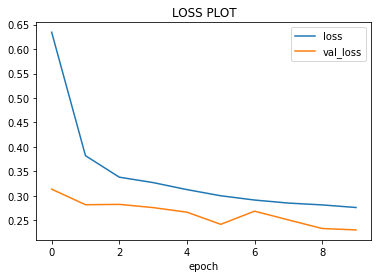

In [ ]:
plt.plot(histr.history['loss'])
plt.plot(histr.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('LOSS PLOT')
plt.xlabel('epoch')
print(type(histr))

Text(0.5, 0, 'epoch')

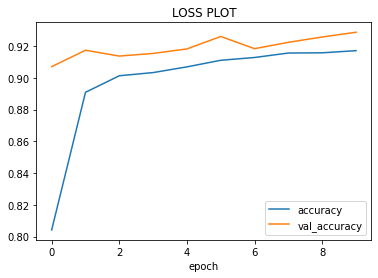

In [ ]:
plt.plot(histr.history['accuracy'])
plt.plot(histr.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy PLOT')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

Test Score:  0.29402900048345326
Test Accuracy:  0.9150000214576721


model.evaluate() returns a list containing two values (loss) and (accuracy)   print(type(score)) gives us -> <class 'list'>

<Response [200]>


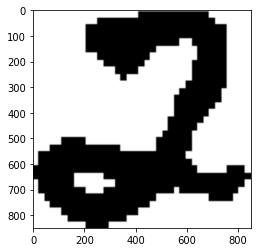

In [ ]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

PIL is Python Image Library and Image is the image module. stream=true is done so as to not get image downloaded, instead it is streamed.

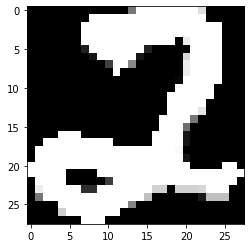

In [ ]:
import cv2

img_array = np.asarray(img)
# print(img_array.shape)
resized = cv2.resize(img_array,(28,28))
# print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
# print(gray_scale)


In [ ]:
image = image/255
image = image.reshape(1,784)

In [ ]:
prediction = model.predict_classes(image)
print("predicted digit is: ", str(prediction))

predicted digit is:  [2]
